In [1]:
# imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
import os 
import sys 

# import and instanciate config file to get access to paths
os.chdir(os.path.dirname(os.getcwd()))
from config.config import Config
config = Config()

# import utils functions
from src.utils.enrich_metadata import count_words, count_chars

In [2]:
# read our book metadata csv file and store to dataframe
books_df = pd.read_csv(os.path.join(config.PROJECT_ROOT, config.DATA_PROCESSED_PATH, 'books_metadata.csv'), names=['id', 'title', 'authors', 'subjects', 'languages', 'formats', 'download_count'])
books_df

,id,title,authors,subjects,languages,formats,download_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883
...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0


In [3]:
books_df[books_df['languages'] == 'en']
books_df

,id,title,authors,subjects,languages,formats,download_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883
...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0


In [4]:
books_df['char_count'] = books_df['id'].apply(count_chars)

In [5]:
# checkout authors with the most char count
books_df.sort_values(by='char_count', ascending=False).head(30)

,id,title,authors,subjects,languages,formats,download_count,char_count
3354,673,The Gutenberg Webster's Unabridged Dictionary,Project Gutenberg,English language -- Dictionaries,en,http://www.gutenberg.org/ebooks/673.txt.utf-8,135,44893844.0
282,29765,Webster's Unabridged Dictionary,Various,English language -- Dictionaries,en,https://www.gutenberg.org/ebooks/29765.txt.utf-8,1465,27956206.0
5571,4656,Checkmates for Four Pieces,Fishburne William Brett,Chess,en,http://www.gutenberg.org/ebooks/4656.txt.utf-8,84,18233034.0
2644,3200,The Entire Project Gutenberg Works of Mark Twain,Twain Mark,American literature -- 19th century Literature...,en,https://www.gutenberg.org/ebooks/3200.txt.utf-8,172,15711659.0
22213,4500,Complete Project Gutenberg Works of George Mer...,Meredith George,English fiction -- 19th century,en,https://www.gutenberg.org/ebooks/4500.txt.utf-8,23,14659571.0
30003,5600,The Historical Romances of Georg Ebers,Ebers Georg,German fiction -- Translations into English Hi...,en,https://www.gutenberg.org/ebooks/5600.txt.utf-8,15,14397606.0
4836,6049,Works of John Bunyan — Complete,Bunyan John,Authors English -- Early modern 1500-1700 -- B...,en,https://www.gutenberg.org/ebooks/6049.txt.utf-8,95,12041616.0
3914,5050,State of the Union Addresses (1790-2006),United States. Presidents,Presidents -- United States -- Messages United...,en,https://www.gutenberg.org/ebooks/5050.txt.utf-8,116,9885644.0
31961,4900,PG Edition of Netherlands series — Complete,Motley John Lothrop,Netherlands -- History,en,https://www.gutenberg.org/ebooks/4900.txt.utf-8,13,9633965.0
7523,3254,Complete Project Gutenberg John Galsworthy Works,Galsworthy John,English literature -- 20th century Literature ...,en,https://www.gutenberg.org/ebooks/3254.txt.utf-8,64,9250951.0


In [6]:
# list of the top 100 authors with the most char count
top_authors = books_df.sort_values(by='char_count', ascending=False).head(150)['authors'].tolist()

In [7]:
top_authors

['Project Gutenberg',
 'Various',
 'Fishburne William Brett',
 'Twain Mark',
 'Meredith George',
 'Ebers Georg',
 'Bunyan John',
 'United States. Presidents',
 'Motley John Lothrop',
 'Galsworthy John',
 'Project Gutenberg',
 'Various',
 'Various',
 'Holmes Oliver Wendell',
 'Grant Ulysses S. (Ulysses Simpson)',
 'Brown Goold',
 'American Anti-Slavery Society',
 'Warner Charles Dudley',
 'Larned J. N. (Josephus Nelson)',
 'Larned J. N. (Josephus Nelson)',
 'Larned J. N. (Josephus Nelson)',
 'Steele Richard Sir',
 'Larned J. N. (Josephus Nelson)',
 'Library of Congress. Copyright Office',
 'Schiller Friedrich',
 'Larned J. N. (Josephus Nelson)',
 'Shakespeare William',
 'Various',
 'Mommsen Theodor',
 'Browning Robert',
 'Chekhov Anton Pavlovich',
 'Various',
 'Lemprière John',
 'Grant Ulysses S. (Ulysses Simpson)',
 'Nuttall P. Austin',
 'Rose Joshua',
 'Bunyan John',
 'United States. Congress',
 'Anonymous',
 'United States. Congress',
 'United States. Congress',
 'Anonymous',
 'Shake

In [8]:
len(top_authors)

150

In [9]:
# convert top_authors to set to remove duplicates then back to list
top_authors = list(set(top_authors))
len(top_authors)

95

In [10]:
top_authors

['Ebers Georg',
 'Galsworthy John',
 'Nuttall P. Austin',
 'Ukers William H. (William Harrison)',
 'Whewell William',
 'Steele Richard Sir',
 'United States. Warren Commission',
 'Ritter Thomas Jefferson',
 'Thomas Aquinas Saint',
 'Larned J. N. (Josephus Nelson)',
 'Gould George M. (George Milbrey)',
 'Twain Mark',
 'Chekhov Anton Pavlovich',
 'Cervantes Saavedra Miguel de',
 'Auerbach Berthold',
 'Thorndike Lynn',
 'Rose Joshua',
 'Spenser Edmund',
 'Mendeleyev Dmitry Ivanovich',
 'Somadeva Bhatta active 11th century',
 'Hardy Thomas',
 'Rymer James Malcolm',
 'Guthrie William',
 'Fishburne William Brett',
 'Thornbury Walter',
 'United States. Presidents',
 'Bunyan John',
 'Lewis Meriwether',
 'Pennsylvania. General Assembly. Committee Appointed to Investigate the Railroad Riots in July 1877',
 'Whittier John Greenleaf',
 'Walsh James J. (James Joseph)',
 'Pierce Ray Vaughn',
 'Godcharles Frederic Antes',
 'Holinshed Raphael',
 'Mommsen Theodor',
 'Westermarck Edward',
 'Platts John'

In [11]:
# order the top_authors by popularity using the download_count column in books_df and remove duplicates
top_authors = books_df[books_df['authors'].isin(top_authors)].sort_values(by='download_count', ascending=False)['authors'].tolist()
top_authors

['Shakespeare William',
 'Shakespeare William',
 'Dumas Alexandre',
 'Tolstoy Leo graf',
 'Dumas Alexandre',
 'Twain Mark',
 'Cervantes Saavedra Miguel de',
 'Tolstoy Leo graf',
 'Montaigne Michel de',
 'Poe Edgar Allan',
 'Mill John Stuart',
 'Josephus Flavius',
 'Dumas Alexandre',
 'Shakespeare William',
 'Shakespeare William',
 'Spenser Edmund',
 'Smith Adam',
 'Twain Mark',
 'Poe Edgar Allan',
 'Twain Mark',
 'Grant Ulysses S. (Ulysses Simpson)',
 'Josephus Flavius',
 'Chekhov Anton Pavlovich',
 'Twain Mark',
 'Mill John Stuart',
 'Bunyan John',
 'Bunyan John',
 'Anonymous',
 'Shakespeare William',
 'Poe Edgar Allan',
 'Galsworthy John',
 'Anonymous',
 'Beeton Mrs. (Isabella Mary)',
 'Various',
 'Chekhov Anton Pavlovich',
 'Various',
 'Spenser Edmund',
 'Shakespeare William',
 'Shakespeare William',
 'Shakespeare William',
 'Shakespeare William',
 'Anonymous',
 'Hardy Thomas',
 'Chekhov Anton Pavlovich',
 'Shakespeare William',
 'Shakespeare William',
 'Bourrienne Louis Antoine Fau

In [12]:
# remove duplicates
top_authors = list(set(top_authors))
top_authors

['Ebers Georg',
 'Galsworthy John',
 'Nuttall P. Austin',
 'Ukers William H. (William Harrison)',
 'Whewell William',
 'Steele Richard Sir',
 'United States. Warren Commission',
 'Ritter Thomas Jefferson',
 'Thomas Aquinas Saint',
 'Gould George M. (George Milbrey)',
 'Larned J. N. (Josephus Nelson)',
 'Twain Mark',
 'Chekhov Anton Pavlovich',
 'Cervantes Saavedra Miguel de',
 'Auerbach Berthold',
 'Thorndike Lynn',
 'Rose Joshua',
 'Spenser Edmund',
 'Mendeleyev Dmitry Ivanovich',
 'Somadeva Bhatta active 11th century',
 'Hardy Thomas',
 'Rymer James Malcolm',
 'Guthrie William',
 'Fishburne William Brett',
 'Thornbury Walter',
 'United States. Presidents',
 'Bunyan John',
 'Lewis Meriwether',
 'Pennsylvania. General Assembly. Committee Appointed to Investigate the Railroad Riots in July 1877',
 'Whittier John Greenleaf',
 'Walsh James J. (James Joseph)',
 'Pierce Ray Vaughn',
 'Godcharles Frederic Antes',
 'Holinshed Raphael',
 'Mommsen Theodor',
 'Westermarck Edward',
 'Platts John'

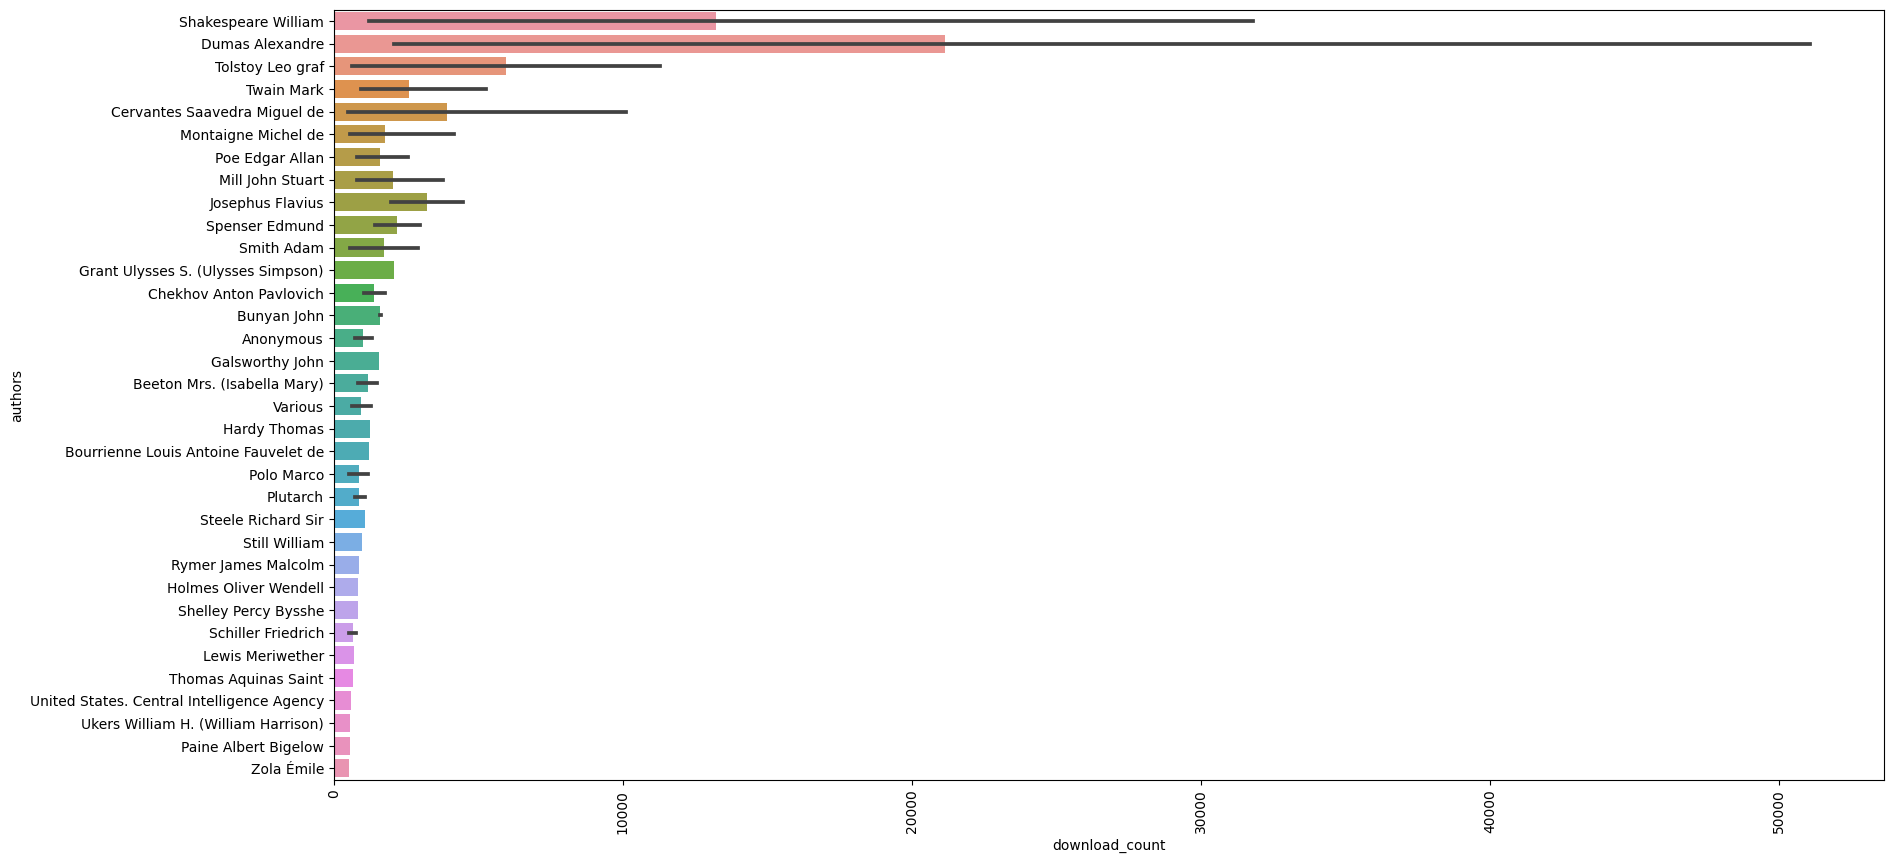

In [13]:
# barplot the distribution of the top 100 authors by download_count
plt.figure(figsize=(20, 10))
sns.barplot(x='download_count', y='authors', data=books_df[books_df['authors'].isin(top_authors)].sort_values(by='download_count', ascending=False).head(100))
plt.xticks(rotation=90)
plt.show()

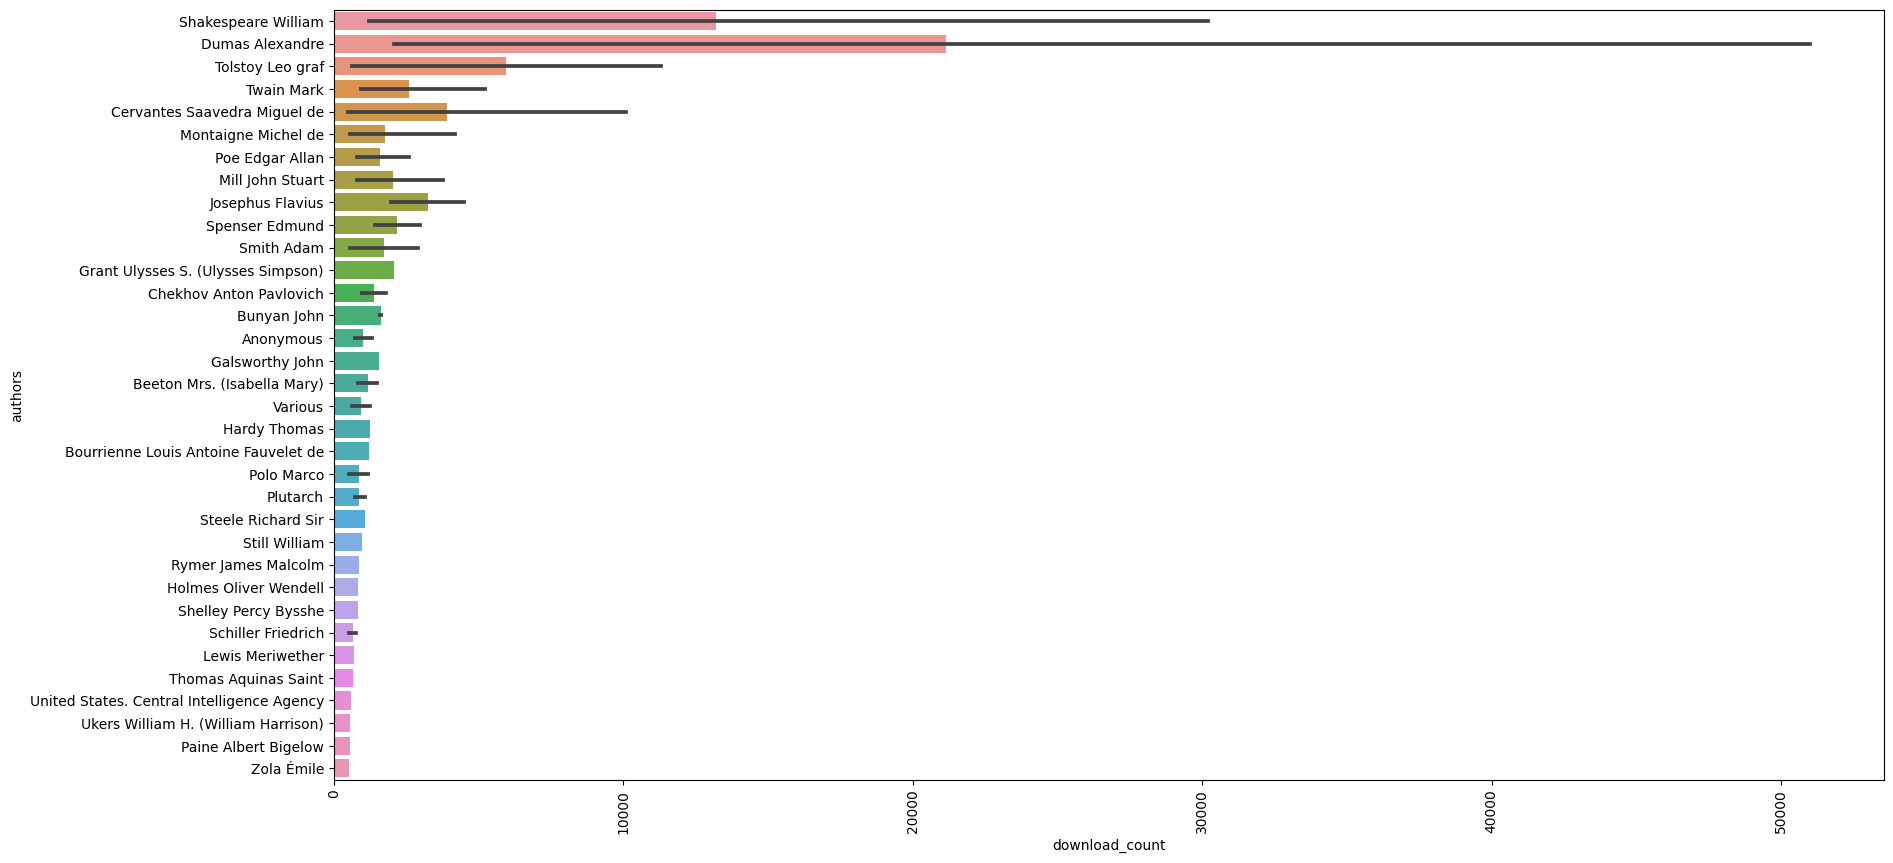

In [14]:
# barplot the distribution of the top 100 authors by char_count
plt.figure(figsize=(20, 10))
sns.barplot(x='download_count', y='authors', data=books_df[books_df['authors'].isin(top_authors)].sort_values(by='download_count', ascending=False).head(100))
plt.xticks(rotation=90)
plt.show()

In [15]:
top_authors

['Ebers Georg',
 'Galsworthy John',
 'Nuttall P. Austin',
 'Ukers William H. (William Harrison)',
 'Whewell William',
 'Steele Richard Sir',
 'United States. Warren Commission',
 'Ritter Thomas Jefferson',
 'Thomas Aquinas Saint',
 'Gould George M. (George Milbrey)',
 'Larned J. N. (Josephus Nelson)',
 'Twain Mark',
 'Chekhov Anton Pavlovich',
 'Cervantes Saavedra Miguel de',
 'Auerbach Berthold',
 'Thorndike Lynn',
 'Rose Joshua',
 'Spenser Edmund',
 'Mendeleyev Dmitry Ivanovich',
 'Somadeva Bhatta active 11th century',
 'Hardy Thomas',
 'Rymer James Malcolm',
 'Guthrie William',
 'Fishburne William Brett',
 'Thornbury Walter',
 'United States. Presidents',
 'Bunyan John',
 'Lewis Meriwether',
 'Pennsylvania. General Assembly. Committee Appointed to Investigate the Railroad Riots in July 1877',
 'Whittier John Greenleaf',
 'Walsh James J. (James Joseph)',
 'Pierce Ray Vaughn',
 'Godcharles Frederic Antes',
 'Holinshed Raphael',
 'Mommsen Theodor',
 'Westermarck Edward',
 'Platts John'

In [16]:
# Ok so we cleaned up the top guys and removed unecessary duplicates and US agencies related authors

In [17]:
top60 = ['Ebers Georg',
 'Lewis Meriwether',
 'Rose J. Holland (John Holland)',
 'Smith Adam',
 'Walsh James J. (James Joseph)',
 'Polo Marco',
 'Josephus Flavius',
 'Alger William Rounseville',
 'Stocking Charles Francis',
 'Twain Mark',
 'Rymer James Malcolm',
 'Kikuchi Dairoku',
 'Spenser Edmund',
 'Pierce Ray Vaughn',
 'Ritter Thomas Jefferson',
 'Holmes Oliver Wendell',
 'Shakespeare William',
 'Larned J. N. (Josephus Nelson)',
 'Haeckel Ernst',
 'Gould George M. (George Milbrey)',
 'Motley John Lothrop',
 'Sherman John',
 'Tolstoy Leo graf',
 'Thomas Aquinas Saint',
 'Reynolds George W. M. (George William MacArthur)',
 'Butler Alban',
 'Whewell William',
 'Zola Émile',
 'Callan Charles J. (Charles Jerome)',
 'Browning Robert',
 'Lincoln Abraham',
 'Nuttall P. Austin',
 'Auerbach Berthold',
 'Shelley Percy Bysshe',
 'Warner Charles Dudley',
 'Thorndike Lynn',
 'Godcharles Frederic Antes',
 'Forster John',
 'Fyffe Charles Alan',
 'Montaigne Michel de',
 'Hardy Thomas',
 'Poe Edgar Allan',
 'Mill John Stuart',
 'Plutarch',
 'Thornbury Walter',
 'Fishburne William Brett',
 'Bancroft Hubert Howe',
 'Benton Thomas Hart',
 'Lemprière John',
 'Guthrie William',
 'Hanbury Daniel',
 'Brown Goold',
 'Wood J. G. (John George)',
 'Westermarck Edward',
 'Whittier John Greenleaf',
 'Grant Ulysses S. (Ulysses Simpson)',
 'Hemans Mrs.',
 'Rose Joshua',
 'Steele Richard Sir',
 'Dumas Alexandre']

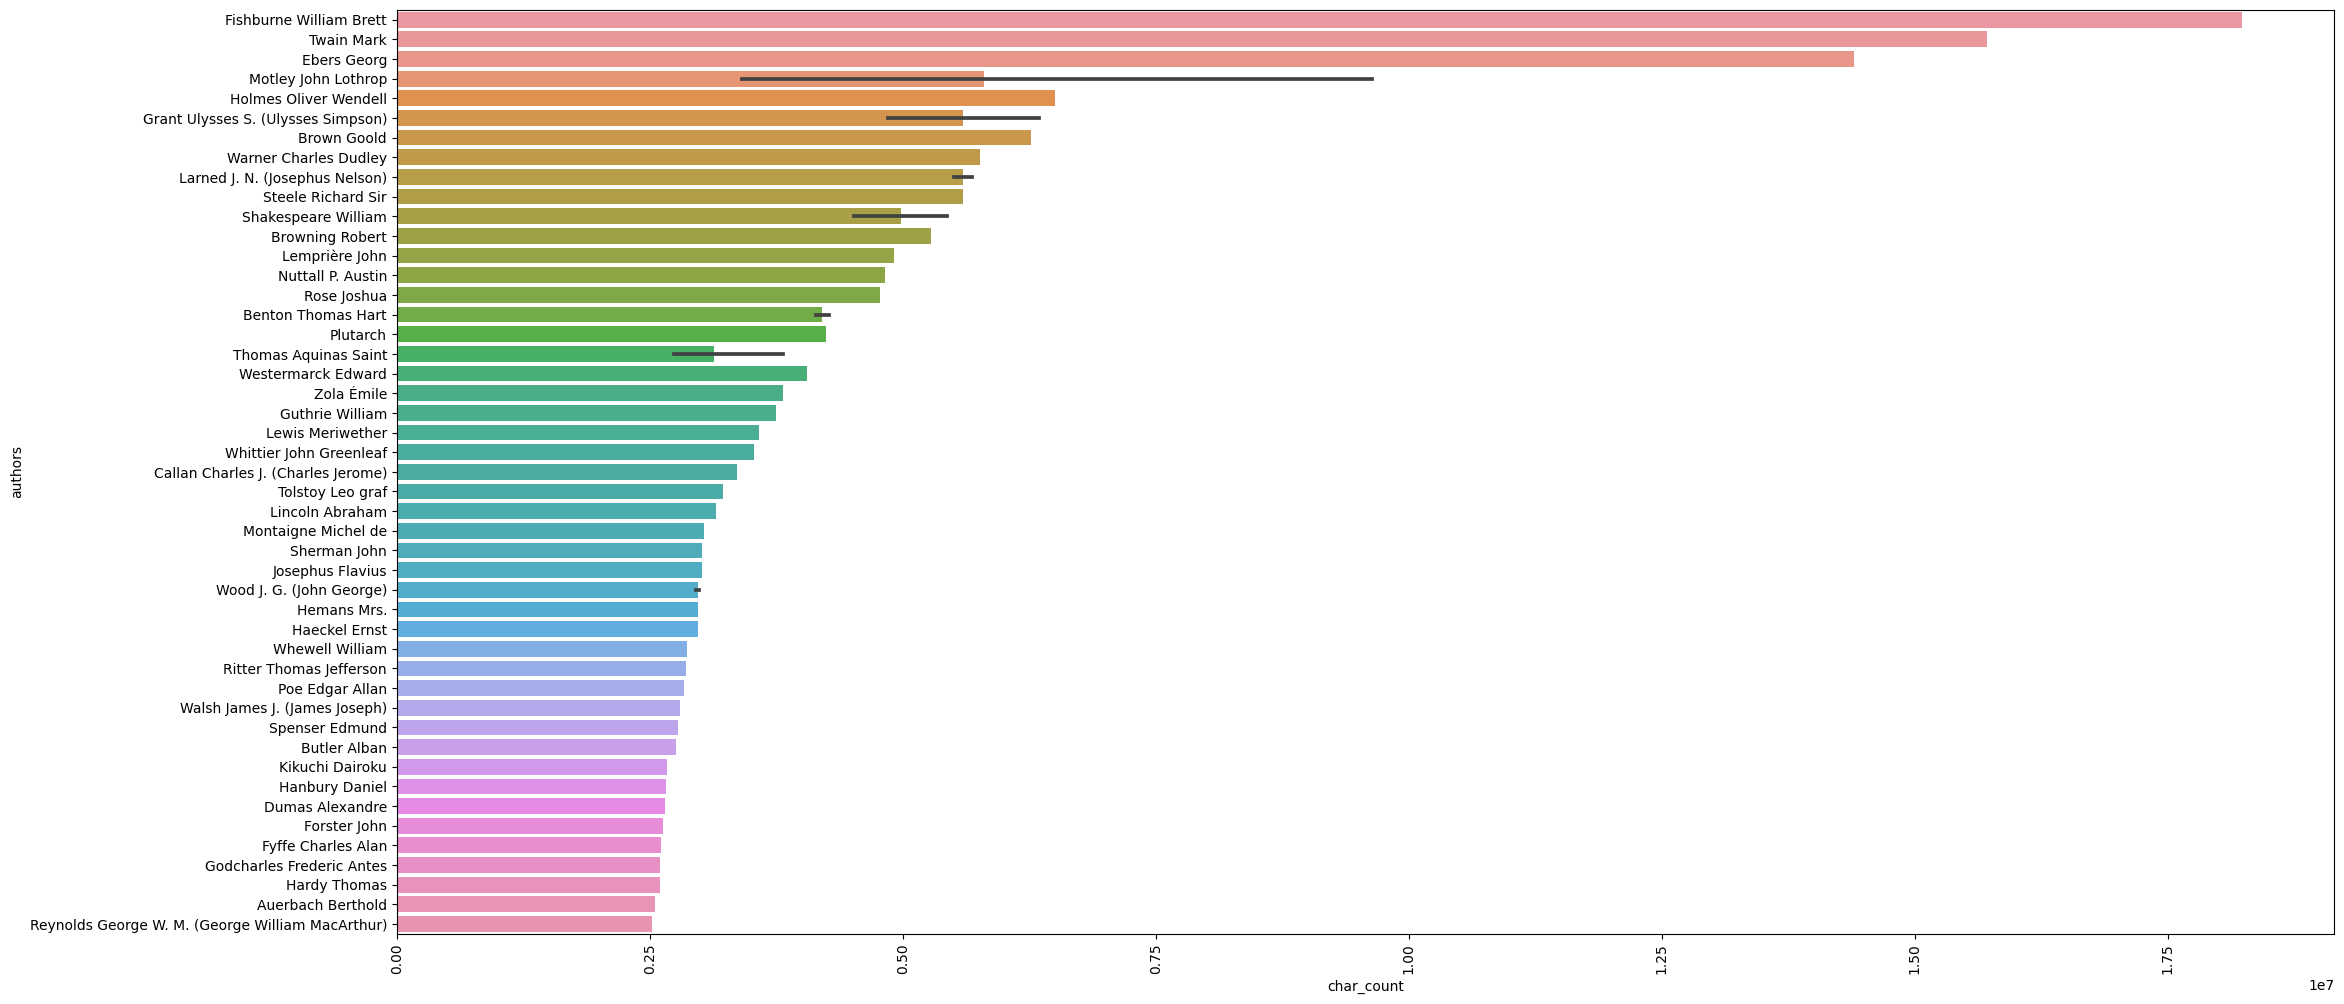

In [18]:
# plot the distribution of the top 60 authors by char_count, 

plt.figure(figsize=(25, 12))
sns.barplot(x='char_count', y='authors', data=books_df[books_df['authors'].isin(top60)].sort_values(by='char_count', ascending=False).head(60))
plt.xticks(rotation=90)
plt.show()

# min guy has 1.5M chars
# 1.5M chars is about 300k words
# 300000 / 256 = 1171.875 chuncks of 256 words

In [19]:
# let's stage the raw data to a new folder
# process_books_from_top60() utils

In [20]:
# check how many books we fetched
!ls -1 /Users/nicolas/code/Nico404/youwritelike/ywl/data/raw/books_top60/ | wc -l

     964


In [21]:
# open the csv file and store to dataframe for further processing
books_df = pd.read_csv(os.path.join(config.PROJECT_ROOT, config.DATA_PROCESSED_PATH, 'books_processed_top60.csv'), names=['Author', 'Book'])
books_df

,Author,Book
0,Author,Book
1,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
2,Ebers Georg,"﻿The Project Gutenberg EBook Margery, by Georg..."
3,Motley John Lothrop,﻿The Project Gutenberg EBook The Life of John ...
4,Warner Charles Dudley,"﻿The Project Gutenberg EBook of England, by Ch..."
...,...,...
960,Warner Charles Dudley,"﻿The Project Gutenberg EBook of As We Go, by C..."
961,Ebers Georg,﻿The Project Gutenberg EBook A Word Only A Wor...
962,Montaigne Michel de,﻿The Project Gutenberg Etext of Quotations fro...
963,Motley John Lothrop,﻿The Project Gutenberg EBook of The Life of Jo...


In [26]:
# check the number of books per author and plot it in a barplot
books_df['Author'].value_counts()
books_df

,Author,Book
0,Alger William Rounseville,"﻿Project Gutenberg's The Friendships of Women,..."
1,Auerbach Berthold,﻿The Project Gutenberg EBook of Joseph in the ...
2,Author,Book
3,Bancroft Hubert Howe,﻿The Project Gutenberg EBook of The Works of H...
4,Benton Thomas Hart,﻿Project Gutenberg's Thirty Years' View (Vol. ...
...,...,...
56,Westermarck Edward,﻿The Project Gutenberg EBook of The Origin and...
57,Whewell William,﻿The Project Gutenberg eBook of History of sci...
58,Whittier John Greenleaf,"﻿Project Gutenberg EBook, Tent on the Beach an..."
59,Wood J. G. (John George),﻿Project Gutenberg's Hardy Perennials and Old ...


In [33]:
# first, group by author and concatenate all books into one string per author
books_df = books_df.groupby('Author')['Book'].apply(' '.join).reset_index()
books_df

,Author,Book
0,Alger William Rounseville,"﻿Project Gutenberg's The Friendships of Women,..."
1,Auerbach Berthold,﻿The Project Gutenberg EBook of Joseph in the ...
2,Author,Book
3,Bancroft Hubert Howe,﻿The Project Gutenberg EBook of The Works of H...
4,Benton Thomas Hart,﻿Project Gutenberg's Thirty Years' View (Vol. ...
...,...,...
56,Westermarck Edward,﻿The Project Gutenberg EBook of The Origin and...
57,Whewell William,﻿The Project Gutenberg eBook of History of sci...
58,Whittier John Greenleaf,"﻿Project Gutenberg EBook, Tent on the Beach an..."
59,Wood J. G. (John George),﻿Project Gutenberg's Hardy Perennials and Old ...


In [41]:
# then, for each author, count the number of words in the concatenated string using a lambda function
books_df['word_count'] = books_df['Book'].apply(lambda x: len(x.split()))
books_df

,Author,Book,char_count,word_count
0,Alger William Rounseville,"﻿Project Gutenberg's The Friendships of Women,...",514755,514755
1,Auerbach Berthold,﻿The Project Gutenberg EBook of Joseph in the ...,1428152,1428152
2,Author,Book,1,1
3,Bancroft Hubert Howe,﻿The Project Gutenberg EBook of The Works of H...,717765,717765
4,Benton Thomas Hart,﻿Project Gutenberg's Thirty Years' View (Vol. ...,1381703,1381703
...,...,...,...,...
56,Westermarck Edward,﻿The Project Gutenberg EBook of The Origin and...,660948,660948
57,Whewell William,﻿The Project Gutenberg eBook of History of sci...,1032520,1032520
58,Whittier John Greenleaf,"﻿Project Gutenberg EBook, Tent on the Beach an...",1855899,1855899
59,Wood J. G. (John George),﻿Project Gutenberg's Hardy Perennials and Old ...,1414072,1414072


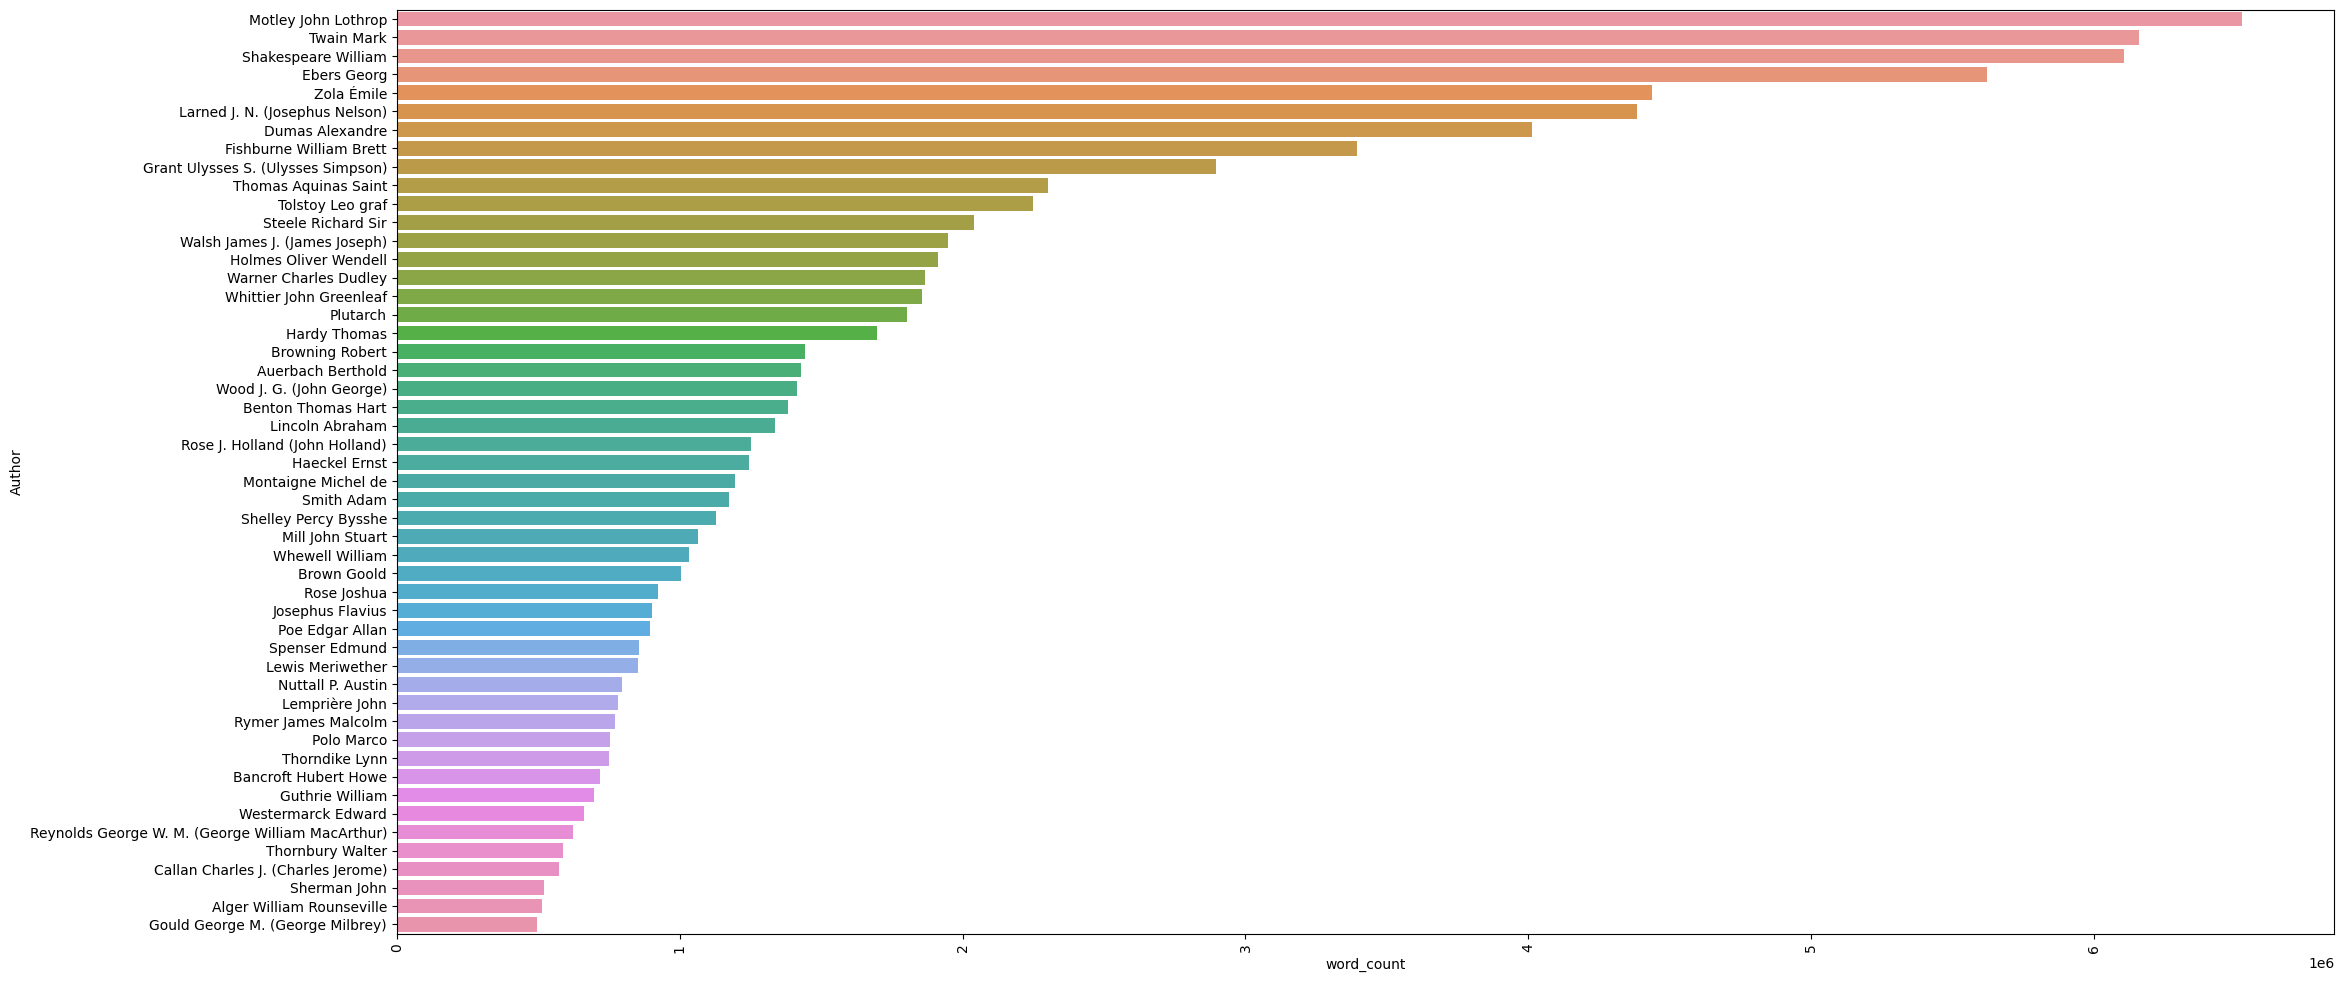

In [44]:
# plot the distribution of the top 60 authors by word_count,
plt.figure(figsize=(25, 12))
sns.barplot(x='word_count', y='Author', data=books_df.sort_values(by='word_count', ascending=False).head(50))
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 